## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Загрузка и первичный анализ данных

In [2]:
df = pd.read_csv("datasets/salary.csv")

print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов\n")
df.head(10)

Размер датасета: 16534 строк, 11 столбцов



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [4]:
print("Уровни опыта (experience_level):")
print(df['experience_level'].value_counts())
print("\nEN = Entry (новичок)")
print("MI = Mid (средний)")
print("SE = Senior (старший)")
print("EX = Executive (эксперт)")

Уровни опыта (experience_level):
experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

EN = Entry (новичок)
MI = Mid (средний)
SE = Senior (старший)
EX = Executive (эксперт)


## 3. Подготовка данных

- EN (Entry) = 0
- MI (Mid) = 1  
- SE (Senior) = 2
- EX (Executive) = 3

In [5]:
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_numeric'] = df['experience_level'].map(experience_mapping)

print(df[['experience_level', 'experience_numeric', 'salary_in_usd']].head(10))

  experience_level  experience_numeric  salary_in_usd
0               SE                   2         202730
1               SE                   2          92118
2               SE                   2         130500
3               SE                   2          96000
4               SE                   2         190000
5               SE                   2         160000
6               MI                   1         400000
7               MI                   1          65000
8               EN                   0         101520
9               EN                   0          45864


## 4. Визуализация связи

Посмотрим, есть ли зависимость между опытом и зарплатой

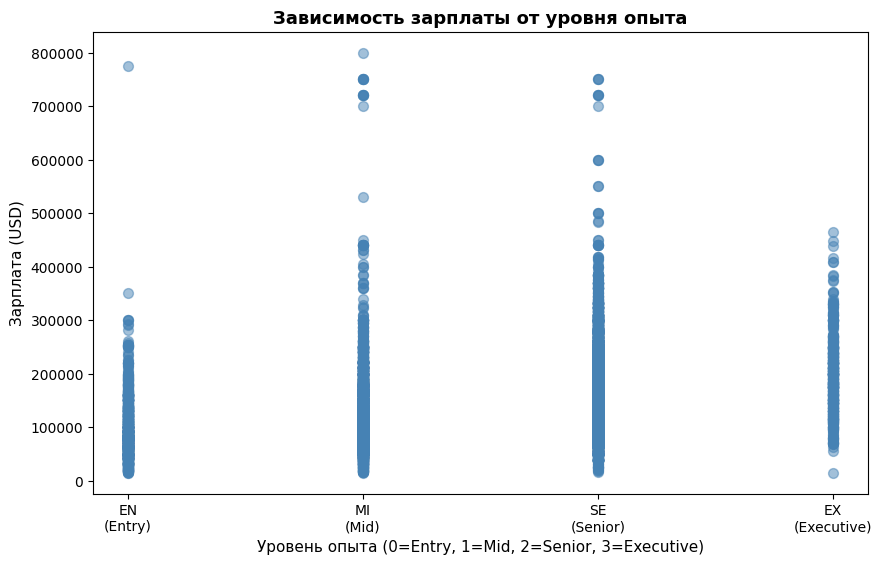

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['experience_numeric'], df['salary_in_usd'], alpha=0.5, s=50, color='steelblue')
plt.xlabel('Уровень опыта (0=Entry, 1=Mid, 2=Senior, 3=Executive)', fontsize=11)
plt.ylabel('Зарплата (USD)', fontsize=11)
plt.title('Зависимость зарплаты от уровня опыта', fontsize=13, fontweight='bold')
plt.xticks([0, 1, 2, 3], ['EN\n(Entry)', 'MI\n(Mid)', 'SE\n(Senior)', 'EX\n(Executive)'])
plt.show()

C:\Users\kalys\AppData\Local\Temp\ipykernel_23908\425421954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd',


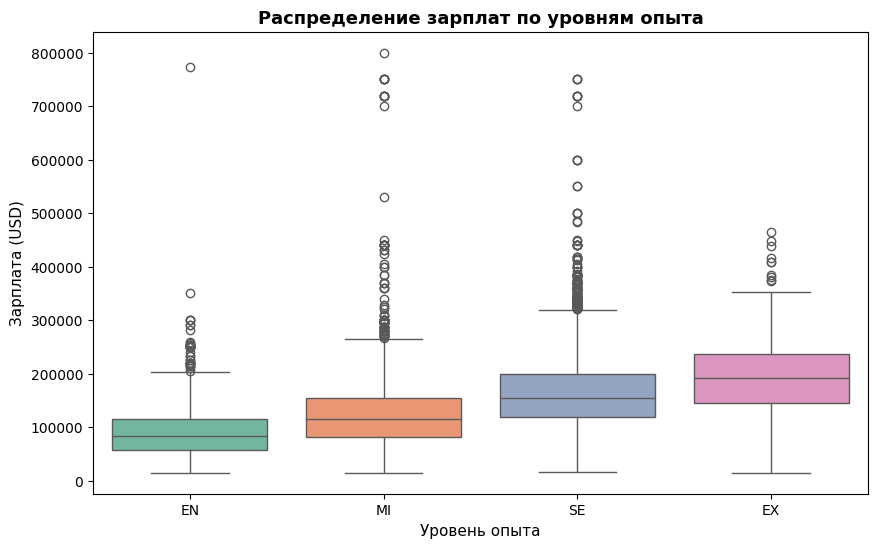

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', 
            order=['EN', 'MI', 'SE', 'EX'], palette='Set2')
plt.xlabel('Уровень опыта', fontsize=11)
plt.ylabel('Зарплата (USD)', fontsize=11)
plt.title('Распределение зарплат по уровням опыта', fontsize=13, fontweight='bold')
plt.show()

In [8]:
avg_salaries = df.groupby('experience_level')['salary_in_usd'].mean()

for level, salary in avg_salaries.items():
    print(f"  {level}: ${salary:.0f}")

  EN: $92327
  EX: $195264
  MI: $125923
  SE: $163663


## 5. Подготовка данных для модели

Разделяем на:
- **X** (feature) - уровень опыта
- **y** (target) - зарплата

In [9]:
X = df[['experience_numeric']]  
y = df['salary_in_usd']         
print(X)
print(y)

       experience_numeric
0                       2
1                       2
2                       2
3                       2
4                       2
...                   ...
16529                   2
16530                   1
16531                   0
16532                   0
16533                   2

[16534 rows x 1 columns]
0        202730
1         92118
2        130500
3         96000
4        190000
          ...  
16529    412000
16530    151000
16531    105000
16532    100000
16533     94665
Name: salary_in_usd, Length: 16534, dtype: int64


### Train/Test Split

Делим данные:
- **80%** для обучения (train)
- **20%** для проверки (test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  
)

print(f"Train set: {X_train.shape[0]} образцов ({X_train.shape[0]/len(df)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} образцов ({X_test.shape[0]/len(df)*100:.0f}%)")

Train set: 13227 образцов (80%)
Test set: 3307 образцов (20%)


## 6. Построение модели

### Линейная регрессия

Формула: $Salary = w_0 + w_1 \cdot Experience$

Где:
- $w_0$ - базовая зарплата (intercept)
- $w_1$ - прибавка за каждый уровень опыта (coefficient)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Коэффициенты модели

In [12]:
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"  Intercept (w₀) = ${intercept:,.2f}")
print(f"  Coefficient (w₁) = ${coefficient:,.2f}")
print(f"  Salary = ${intercept:,.2f} + ${coefficient:,.2f} × Experience")

  Intercept (w₀) = $89,074.40
  Coefficient (w₁) = $37,123.00
  Salary = $89,074.40 + $37,123.00 × Experience


## 7. Предсказания

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Примеры предсказаний на test set:\n")
comparison = pd.DataFrame({
    'Опыт': X_test['experience_numeric'].values[:10],
    'Реальная зарплата': y_test.values[:10],
    'Предсказанная': y_test_pred[:10],
    'Ошибка': y_test.values[:10] - y_test_pred[:10]
})

print(comparison.to_string(index=False))

Примеры предсказаний на test set:

 Опыт  Реальная зарплата  Предсказанная         Ошибка
    2             130000  163320.402599  -33320.402599
    1              70000  126197.402765  -56197.402765
    2             276000  163320.402599  112679.597401
    2              48585  163320.402599 -114735.402599
    1             115500  126197.402765  -10697.402765
    2             193000  163320.402599   29679.597401
    2             120000  163320.402599  -43320.402599
    2             168700  163320.402599    5379.597401
    2             194521  163320.402599   31200.597401
    2             127876  163320.402599  -35444.402599


## 8. Оценка качества модели

### Метрики:
- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error) 
- **R²** (R-squared) 

In [18]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n{'Метрика':<15} {'Train':<20} {'Test':<20}")
print("-" * 60)
print(f"{'MAE':<15} ${train_mae:>15,.2f}    ${test_mae:>15,.2f}")
print(f"{'RMSE':<15} ${train_rmse:>15,.2f}    ${test_rmse:>15,.2f}")
print(f"{'R²':<15} {train_r2:>18.4f}    {test_r2:>18.4f}")
print(f"  • MAE = ${test_mae:,.0f} - в среднем модель ошибается на эту сумму")
print(f"  • R² = {test_r2:.4f} - модель объясняет {test_r2*100:.1f}% вариации данных")


Метрика         Train                Test                
------------------------------------------------------------
MAE             $      47,083.08    $      48,380.02
RMSE            $      62,866.70    $      68,632.48
R²                          0.1369                0.0844
  • MAE = $48,380 - в среднем модель ошибается на эту сумму
  • R² = 0.0844 - модель объясняет 8.4% вариации данных


## 9. Визуализация результатов

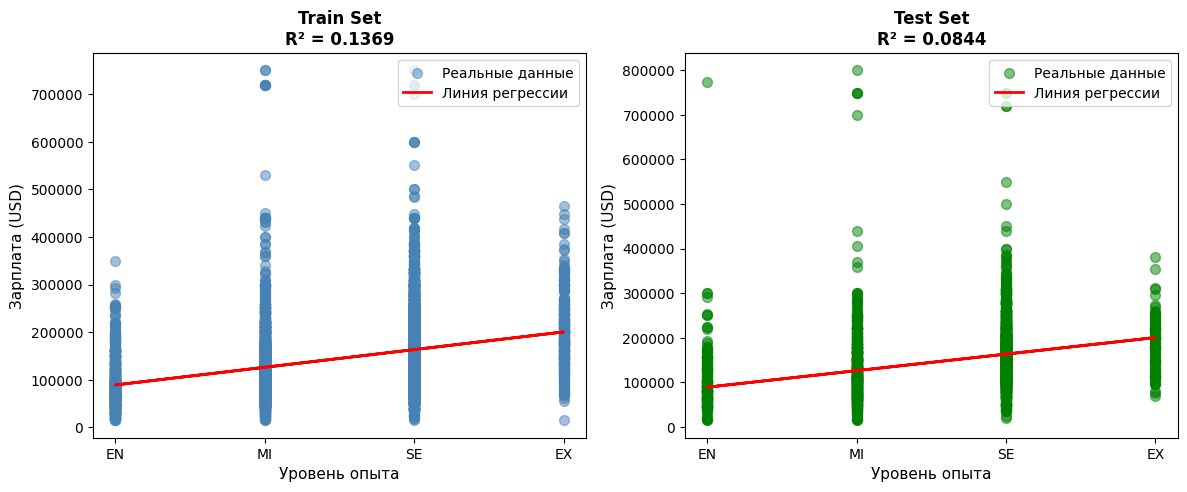

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
axes[0].scatter(X_train, y_train, alpha=0.5, s=50, color='steelblue', label='Реальные данные')
axes[0].plot(X_train, y_train_pred, color='red', linewidth=2, label='Линия регрессии')
axes[0].set_xlabel('Уровень опыта', fontsize=11)
axes[0].set_ylabel('Зарплата (USD)', fontsize=11)
axes[0].set_title(f'Train Set\nR² = {train_r2:.4f}', fontsize=12, fontweight='bold')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['EN', 'MI', 'SE', 'EX'])
axes[0].legend()

# Test set
axes[1].scatter(X_test, y_test, alpha=0.5, s=50, color='green', label='Реальные данные')
axes[1].plot(X_test, y_test_pred, color='red', linewidth=2, label='Линия регрессии')
axes[1].set_xlabel('Уровень опыта', fontsize=11)
axes[1].set_ylabel('Зарплата (USD)', fontsize=11)
axes[1].set_title(f'Test Set\nR² = {test_r2:.4f}', fontsize=12, fontweight='bold')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['EN', 'MI', 'SE', 'EX'])
axes[1].legend()
plt.show()

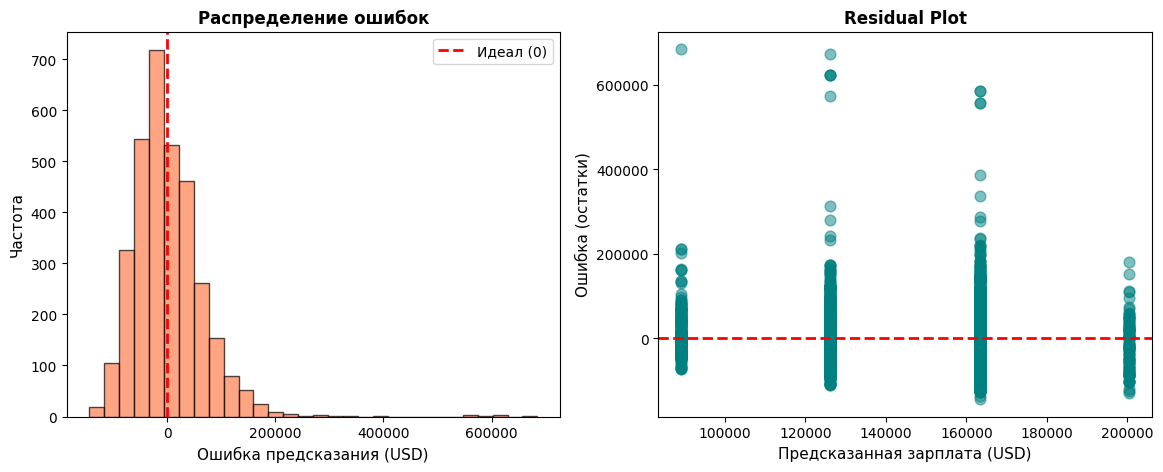

In [20]:
residuals = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма ошибок
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Идеал (0)')
axes[0].set_xlabel('Ошибка предсказания (USD)', fontsize=11)
axes[0].set_ylabel('Частота', fontsize=11)
axes[0].set_title('Распределение ошибок', fontsize=12, fontweight='bold')
axes[0].legend()

# Residual scatter
axes[1].scatter(y_test_pred, residuals, alpha=0.5, s=60, color='teal')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Предсказанная зарплата (USD)', fontsize=11)
axes[1].set_ylabel('Ошибка (остатки)', fontsize=11)
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')

plt.show()

## 10. Использование модели для предсказаний

Теперь можем предсказывать зарплату для любого уровня опыта!

In [22]:
experience_levels = np.array([[0], [1], [2], [3]])  
predicted_salaries = model.predict(experience_levels)

print(predicted_salaries)


avg_salaries = df.groupby('experience_level')['salary_in_usd'].mean()

for level, salary in avg_salaries.items():
    print(f"  {level}: ${salary:.0f}")

[ 89074.40292985 126197.40276453 163320.4025992  200443.40243388]
  EN: $92327
  EX: $195264
  MI: $125923
  SE: $163663


c:\projc\teaching_activities\data_analysis_course\data_analysis_course\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---

# Задача


1) Попробовать датасет `car_data.csv`
2) Предсказать цену авто по определенной переменной
3) Построить графики